In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\breast-cancer-prediction\data.csv")

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
#Removing unwanted columns 

y = df.diagnosis
remove_unwanted_columns = ['id','Unnamed: 32','diagnosis']
x = df.drop(remove_unwanted_columns,axis=1)
x.head(2)
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Text(0.5, 1.0, 'malignant/benign')

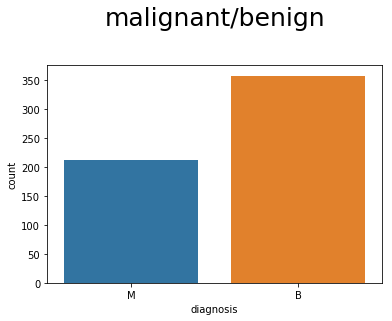

In [5]:
#sns_plot of malignant and benign

sns_plot = sns.countplot(y,label="Count")
plt.title('malignant/benign',fontsize=25,loc='center',pad=40)


In [6]:
#Counting total no. of persons are in Benign,Malignant seperate

Benign,Malignant = y.value_counts()

print('Number of Benign :',Benign)

print('Number of Malignant :',Malignant)

Number of Benign : 357
Number of Malignant : 212


In [7]:
#For Eg:The question is appeared in my mind the area_mean feature's max value is 2500 and smoothness_mean features' max 0.16340
#do we need standirdization or normalization before visualization, feature selection, feature extraction or classificaiton
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
#Seperating the features by taking their first 10 features into 3 groups

feature_selection1 = list(x.columns[0:10])

feature_selection2 = list(x.columns[10:20])

feature_selection3 = list(x.columns[20:30])

feature_selection4 = list(x.columns[0:30])

print(feature_selection1)
print('-----------------------------')
print(feature_selection2)
print('-----------------------------')
print(feature_selection3)
print('------------------------------')
print(feature_selection4)


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
-----------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
------------------------------
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_wo

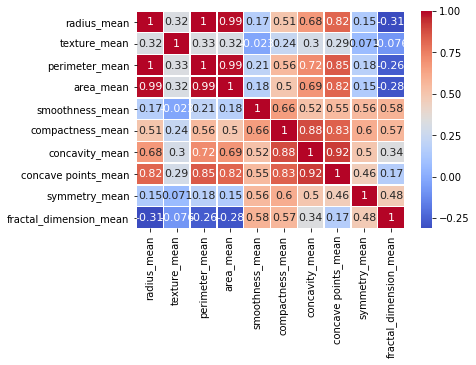

In [9]:
#Finding Coorelationn for first group

corr = df[feature_selection1].corr()
sns.heatmap(corr,annot=True,annot_kws={'size': 11},linewidths=0.5,xticklabels= feature_selection1, yticklabels= feature_selection1,
           cmap= 'coolwarm') 


In [10]:
#chosen texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean based upon correlation between values

selected_corr1 =  ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean',
                   'fractal_dimension_mean']

In [11]:
#now split our data into train and test

train,test = train_test_split(df,test_size = 0.3,shuffle=True)
print('Train_size :',train.shape)
print('Test_size :',test.shape)

Train_size : (398, 33)
Test_size : (171, 33)


score : 0.935672514619883
Accuracy: 0.935672514619883
cnf_matrix [[114   3]
 [  8  46]]


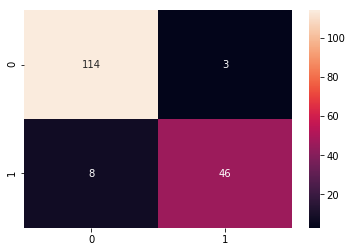

In [12]:
#Training and Testing the data
#RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr1],df['diagnosis'],test_size= 0.30,shuffle=True)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print('score :',score)
y_pred = model.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_pred,y_test))
#rint('F1_score:' ,f1_score(y_pred,y_test))
#print('Precison:',average_precision_score(y_test,y_pred))
#print('F1_score:',f1_score(y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('cnf_matrix',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt='d')


In [13]:
Prediction1 = model.predict(X_test)
Prediction1

array(['B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'M'], dtype=object)

In [14]:
#Decisiontree classifier

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr1],df['diagnosis'],test_size= 0.30,shuffle=True)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print('score :',model.score(X_test,y_test))

score : 0.9005847953216374


In [15]:
#KNN Classifier

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr1],df['diagnosis'],test_size= 0.30,shuffle=True)

model = KNeighborsClassifier()
model.fit(X_train,y_train)

print('score :',model.score(X_test,y_test))


score : 0.8538011695906432


In [16]:
#SVM Classifier

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr1],df['diagnosis'],test_size= 0.30,shuffle=True)

model = svm.SVC()
model.fit(X_train,y_train)

print('score :',model.score(X_test,y_test))


score : 0.8771929824561403


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
#LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr1],df['diagnosis'],test_size= 0.30,shuffle=True)

model = LogisticRegression()
model.fit(X_train,y_train)

print('score :',model.score(X_test,y_test))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score : 0.8654970760233918


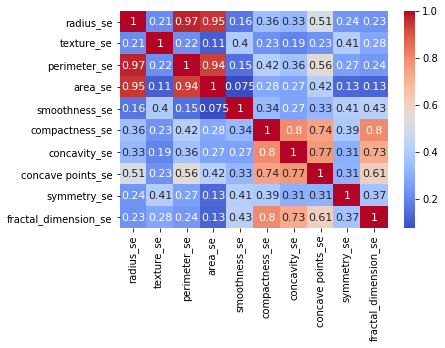

In [18]:
#finding correlation for second group

corr = df[feature_selection2].corr()
sns.heatmap(corr,annot=True,annot_kws={'size': 11},xticklabels= feature_selection2, yticklabels= feature_selection2,
           cmap= 'coolwarm') 
 

In [19]:
selected_corr2 = ['radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',  'concave points_se', 'symmetry_se']

score: 0.847953216374269
predictef: ['B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M'
 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B']
cnf_matrix [[73 30]
 [49 19]]


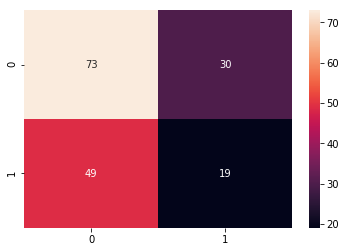

In [20]:
X_train,X_test,y_train,y_test = train_test_split(df[selected_corr2],df['diagnosis'],test_size = 0.30,shuffle = True)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)
print('score:',model.score(X_test,y_test))
print('predictef:',model.predict(X_test))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('cnf_matrix',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)

In [21]:
#Decisiontree classifier

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr2],df['diagnosis'],test_size= 0.30,shuffle=True)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print('score :',model.score(X_test,y_test))

score : 0.7953216374269005


In [22]:
#KNN Classifier

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr2],df['diagnosis'],test_size= 0.30,shuffle=True)

model = KNeighborsClassifier()
model.fit(X_train,y_train)

print('score :',model.score(X_test,y_test))


score : 0.8830409356725146


In [23]:
#SVM Classifier

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr1],df['diagnosis'],test_size= 0.30,shuffle=True)

model = svm.SVC()
model.fit(X_train,y_train)

print('score :',model.score(X_test,y_test))


score : 0.8596491228070176


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
#LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(df[selected_corr1],df['diagnosis'],test_size= 0.30,shuffle=True)

model = LogisticRegression()
model.fit(X_train,y_train)

print('score :',model.score(X_test,y_test))

score : 0.847953216374269


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


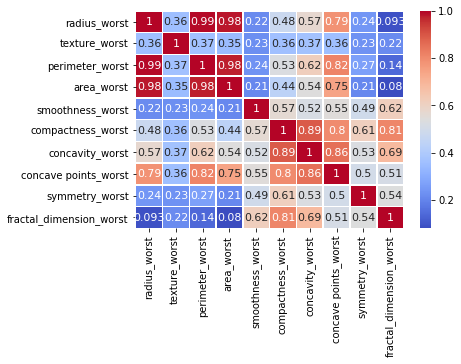

In [25]:
corr = df[feature_selection3].corr()
sns.heatmap(corr,annot=True,annot_kws={'size': 11},linewidths=0.5,xticklabels= feature_selection3, yticklabels= feature_selection3,
           cmap= 'coolwarm') 


In [26]:
selected_corr3 = ['radius_worst','texture_worst','smoothness_worst','compactness_worst','symmetry_worst']

score : 0.9707602339181286
predicted: ['B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M']
cnf_matrix: [[76 33]
 [46 16]]


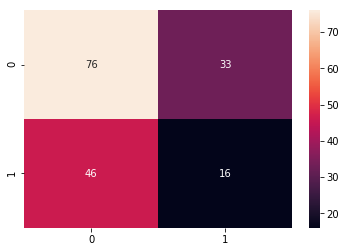

In [27]:
X_train,X_test,y_train,y_test = train_test_split(df[selected_corr3],df['diagnosis'],test_size = 0.30,shuffle = True)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print('score :',score)
print('predicted:',model.predict(X_test))
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print('cnf_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print('score :',score)

score : 0.935672514619883


In [29]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print('score :',score)

score : 0.9532163742690059


In [30]:
model = svm.SVC()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print('score :',score)

score : 0.9415204678362573


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
model = LogisticRegression()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print('score :',score)

score : 0.9649122807017544


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


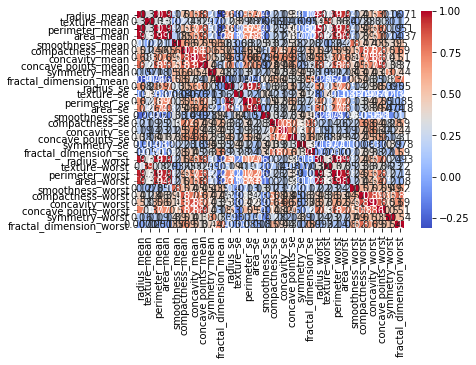

In [32]:
#selecting all features

corr = df[feature_selection4].corr()
sns.heatmap(corr,annot=True,annot_kws={'size': 10},xticklabels= feature_selection4, yticklabels= feature_selection4,
           cmap= 'coolwarm') 

In [33]:
selected_corr4 = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean',
                   'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 
                  'concave points_se', 'symmetry_se','radius_worst','texture_worst','smoothness_worst',
                  'compactness_worst','symmetry_worst']

score: 0.9649122807017544
predicted: ['M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B']
confusion_matrix: [[78 28]
 [44 21]]


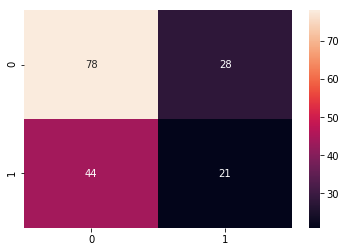

In [34]:
X_train,X_test,y_train,y_test = train_test_split(df[selected_corr4],df['diagnosis'],test_size = 0.30,shuffle = True)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

print('score:',model.score(X_test,y_test))
print('predicted:',model.predict(X_test))
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print('confusion_matrix:',cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(df[selected_corr4],df['diagnosis'],test_size = 0.30,shuffle = True)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print('score:',model.score(X_test,y_test))

score: 0.9239766081871345


In [36]:
X_train,X_test,y_train,y_test = train_test_split(df[selected_corr4],df['diagnosis'],test_size = 0.30,shuffle = True)

model = KNeighborsClassifier()
model.fit(X_train,y_train)

print('score:',model.score(X_test,y_test))

score: 0.8947368421052632


In [37]:
X_train,X_test,y_train,y_test = train_test_split(df[selected_corr4],df['diagnosis'],test_size = 0.30,shuffle = True)

model = svm.SVC()
model.fit(X_train,y_train)

print('score:',model.score(X_test,y_test))

score: 0.9590643274853801


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
X_train,X_test,y_train,y_test = train_test_split(df[selected_corr4],df['diagnosis'],test_size = 0.30,shuffle = True)

model = LogisticRegression()
model.fit(X_train,y_train)

print('score:',model.score(X_test,y_test))

score: 0.9473684210526315


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
#feature selection1 by taking first 10 features and its corelation

tabular_column = {'score':[0.9181286549707602,0.9064327485380117,0.9005847953216374,0.9239766081871345,0.8596491228070176]}

df = pd.DataFrame(tabular_column,index = ['RFC','DTC','KNN','SVM','Logistic_reg'])
df

,score
RFC,0.918129
DTC,0.906433
KNN,0.900585
SVM,0.923977
Logistic_reg,0.859649


In [40]:
#feature selection2 by taking next 10 features and its corelation

tabular_column = {'score':[ 0.8070175438596491,0.8245614035087719,0.8011695906432749,0.8713450292397661,0.8654970760233918]}

df = pd.DataFrame(tabular_column,index = ['RFC','DTC','KNN','SVM','Logistic_reg'])
df

,score
RFC,0.807018
DTC,0.824561
KNN,0.801170
SVM,0.871345
Logistic_reg,0.865497


In [41]:
#feature selection3 by taking last 10 features and its corelation

tabular_column = {'score':[0.9415204678362573,0.8596491228070176,0.8947368421052632,0.8888888888888888,0.9005847953216374]}
    
df = pd.DataFrame(tabular_column,index = ['RFC','DTC','KNN','SVM','Logistic_reg'])
df

,score
RFC,0.941520
DTC,0.859649
KNN,0.894737
SVM,0.888889
Logistic_reg,0.900585


In [6]:
#feature selection4 by taking all features and its corelation

tabular_column = {'score':[0.9590643274853801,0.9181286549707602,0.9532163742690059,0.9122807017543859,0.935672514619883]}
    
df = pd.DataFrame(tabular_column,index = ['RFC','DTC','KNN','SVM','Logistic_reg'])
df

,score
RFC,0.959064
DTC,0.918129
KNN,0.953216
SVM,0.912281
Logistic_reg,0.935673


In [11]:
import pandas as pd
x = [1,2,3,4]
y = pd.DataFrame(x,index=[1,2,3,4],columns=['no'])
y


,no
1,1
2,2
3,3
4,4


In [12]:
df = pd.read_csv(r"C:\Users\user\Downloads\Assignment_1_2 (2)\Assignment_1 2\chit fund exercise.csv")
df.head(2)

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
0,1,2000,40000,2500,37500,400
1,2,2000,42000,2500,39500,320


In [16]:
df['Days'] = df.apply(lambda row:row.Month*30.417,axis=1)

In [17]:
df

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,days,Days
0,1,2000,40000,2500,37500,400,30.417,30.417
1,2,2000,42000,2500,39500,320,60.834,60.834
2,3,2000,45000,2500,42500,200,91.251,91.251
3,4,2000,48000,2500,45500,80,121.668,121.668
4,5,2000,40000,2500,37500,400,152.085,152.085
5,6,2000,42000,2500,39500,320,182.502,182.502
6,7,2000,43000,2500,40500,280,212.919,212.919
7,8,2000,44000,2500,41500,240,243.336,243.336
8,9,2000,40000,2500,37500,400,273.753,273.753
9,10,2000,42000,2500,39500,320,304.170,304.170
